In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
print("hello world")

hello world


In [3]:
# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (inferred from image)
edges = [
    ("Attacker", "Pad", {"user": 0.6, "root": 0.6}),
    ("Attacker", "Web Server", {"user": 0.8, "root": 0.6}),
    ("Attacker", "Host 1", {"user": 0.6, "root": 0.48}),

    ("Pad", "Host 1", {"user": 0.6, "root": 0.48}),
    ("Pad", "Host 2", {"user": 0.32, "root": 0.32}),
    ("Pad", "Host 3", {"user": 0.32, "root": 0.32}),
    ("Pad", "Web Server", {"user": 0.8, "root": 0.6}),

    ("Host 1", "Pad", {"user": 0.6, "root": 0.6}),
    ("Host 1", "Web Server", {"user": 0.8, "root": 0.6}),
    ("Host 1", "Host 2", {"user": 0.32, "root": 0.32}),
    ("Host 1", "Host 3", {"user": 0.32, "root": 0.32}),

    ("Host 2", "Host 3", {"user": 0.8, "root": 0.8}),
    ("Host 2", "File Server", {"user": 0.8, "root": 0.6}),
    ("Host 2", "Data Server", {"user": 0.8, "root": 0.6}),

    ("Host 3", "Host 2", {"user": 0.8, "root": 0.8}),
    ("Host 3", "File Server", {"user": 0.8, "root": 0.6}),
    ("Host 3", "Data Server", {"user": 0.8, "root": 0.6}),

    ("Web Server", "File Server", {"user": 0.8, "root": 0.04}),
    ("Web Server", "Data Server", {"user": 0.8, "root": 0.04}),

    ("File Server", "Data Server", {"user": 0.8, "root": 0.04})
]

# Add edges to the graph
G.add_edges_from(edges)

# Print nodes and edges
print("Nodes:", G.nodes())
print("Edges:")
for u, v, attr in G.edges(data=True):
    print(f"{u} -> {v}, weights: user={attr['user']}, root={attr['root']}")


Nodes: ['Attacker', 'Pad', 'Web Server', 'Host 1', 'Host 2', 'Host 3', 'File Server', 'Data Server']
Edges:
Attacker -> Pad, weights: user=0.6, root=0.6
Attacker -> Web Server, weights: user=0.8, root=0.6
Attacker -> Host 1, weights: user=0.6, root=0.48
Pad -> Host 1, weights: user=0.6, root=0.48
Pad -> Host 2, weights: user=0.32, root=0.32
Pad -> Host 3, weights: user=0.32, root=0.32
Pad -> Web Server, weights: user=0.8, root=0.6
Web Server -> File Server, weights: user=0.8, root=0.04
Web Server -> Data Server, weights: user=0.8, root=0.04
Host 1 -> Pad, weights: user=0.6, root=0.6
Host 1 -> Web Server, weights: user=0.8, root=0.6
Host 1 -> Host 2, weights: user=0.32, root=0.32
Host 1 -> Host 3, weights: user=0.32, root=0.32
Host 2 -> Host 3, weights: user=0.8, root=0.8
Host 2 -> File Server, weights: user=0.8, root=0.6
Host 2 -> Data Server, weights: user=0.8, root=0.6
Host 3 -> Host 2, weights: user=0.8, root=0.8
Host 3 -> File Server, weights: user=0.8, root=0.6
Host 3 -> Data Serv

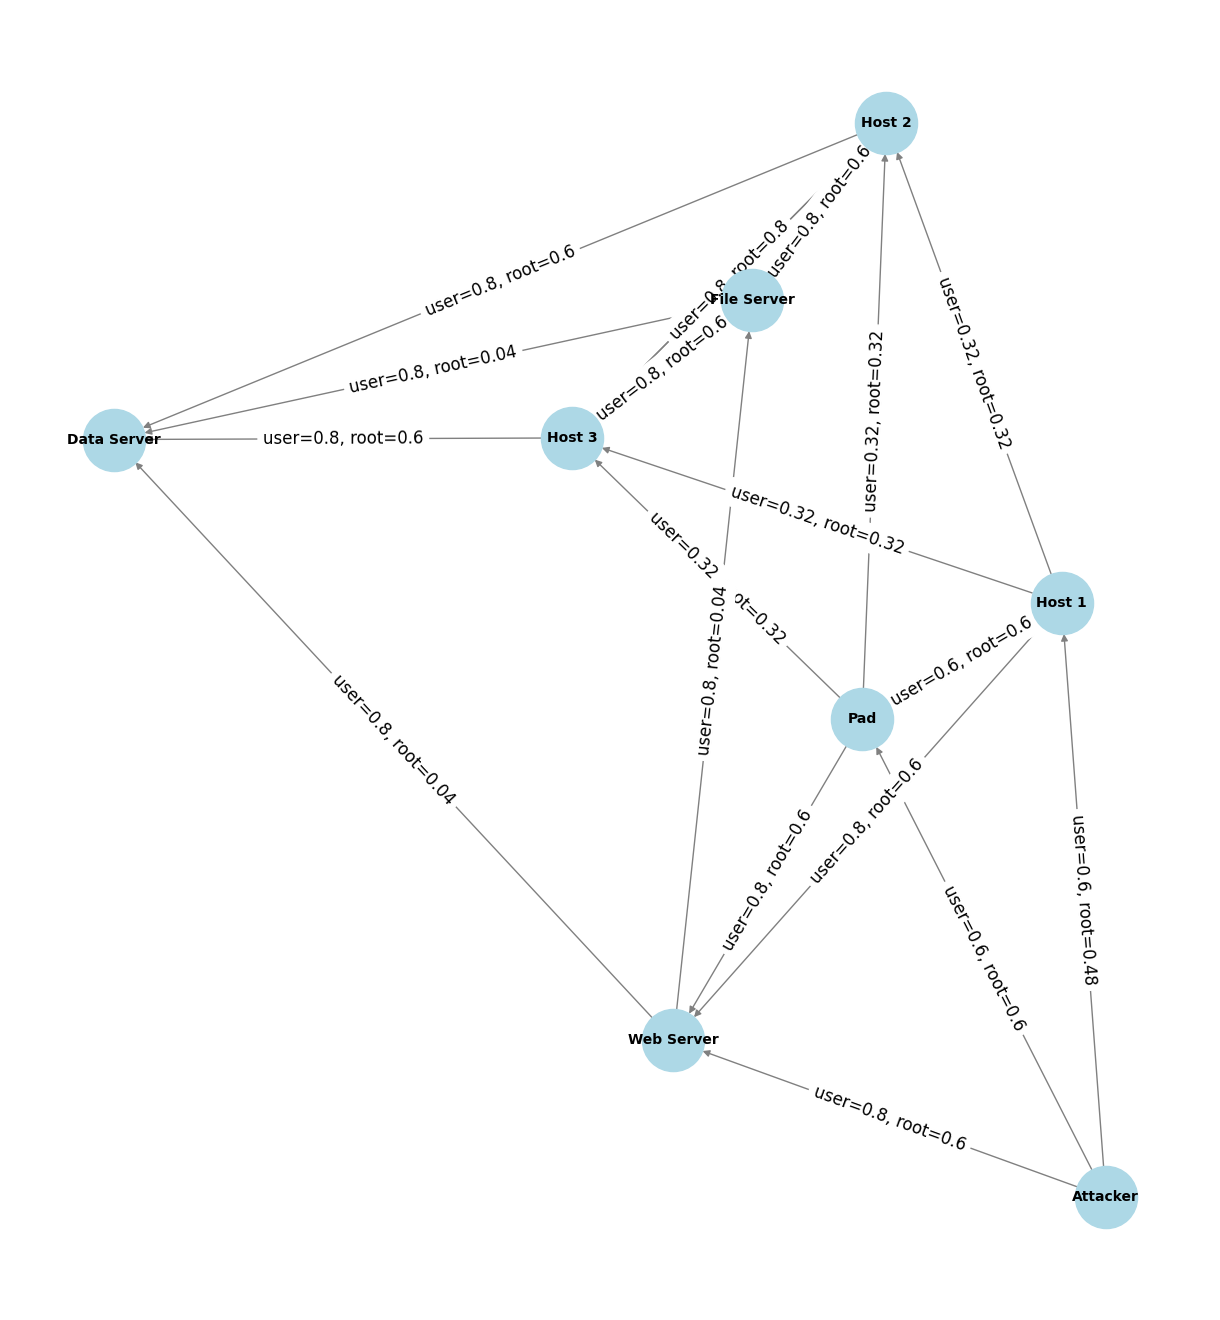

In [4]:

# Draw the graph
plt.figure(figsize=(12, 13))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, font_weight='bold')

# Draw edge labels with weights
edge_labels = {(u, v): f"user={d['user']}, root={d['root']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.show()

In [6]:
def greedy_path_max(graph, start, goal):
    # Build a list of network nodes excluding the attacker
    node_list = [node for node in graph.nodes() if node != start]
    visited_vector = [0] * len(node_list)

    path = [start]
    current = start

    while current != goal:
        neighbors = list(graph.successors(current))
        if not neighbors:
            print("No path to goal found.")
            return path, visited_vector

        # Choose the neighbor with the highest max(user, root)
        next_node = max(
            neighbors,
            key=lambda n: max(graph[current][n]['user'], graph[current][n]['root'])
        )
        current = next_node
        path.append(current)

        # Mark as visited only if it's not the attacker
        if current != start:
            idx = node_list.index(current)
            if visited_vector[idx] == 1:
                print("Cycle detected. Breaking.")
                break
            visited_vector[idx] = 1

    return path, visited_vector, node_list

# Run it
path, visit_vector, tracked_nodes = greedy_path_max(G, "Attacker", "Data Server")

# Print results
print("Greedy path using max(user, root):")
print(" -> ".join(path))

print("\nVisited node vector:")
for node, visited in zip(tracked_nodes, visit_vector):
    print(f"{node}: {visited}")

Greedy path using max(user, root):
Attacker -> Web Server -> File Server -> Data Server

Visited node vector:
Pad: 0
Web Server: 1
Host 1: 0
Host 2: 0
Host 3: 0
File Server: 1
Data Server: 1
